In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

2023-11-29 16:02:35.841042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 16:02:35.841084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 16:02:35.842200: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 16:02:37.623952: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

funnel_config = set_task(funnel_config, "ion")
funnel_config.model.reference_process_key = "oudstl"

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 0.3
    funnel_config.model.alpha = 1.075
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 2000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 1 * 10**(-4)
# funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [3]:
funnel_config.wandb.name='experiment=ion'
funnel_config.wandb.group='debugging_dds_codebase'

In [4]:
# funnel_config.trainer.epochs = 2000
out_dict = train_dds(funnel_config)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: angusphillips (oxcsml). Use `wandb login --relogin` to force relogin


('epoch: %s %s  loss: %s', 0, 'TRAIN', 344.5038146972656)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 315.588134765625)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 307.05181884765625)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 288.7055969238281)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 277.08447265625)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 269.77459716796875)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 257.54364013671875)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 249.26925659179688)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 247.261962890625)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 244.6100311279297)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 231.43089294433594)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 228.88021850585938)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 225.67349243164062)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 223.41021728515625)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 219.82284545898438)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 219.8695068359375)
('epoch: %s %s  loss: %s', 16, 'TRAIN', 217.0070037841797)
('

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


elbo_results/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
elbo_results/loss,█▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
elbo_results_eval/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
elbo_results_eval/loss,▅▄▄▂▅▆▅▂▄▄▃█▃▅▄▂▆▆▅▅▅▃▅▃▆▆▄▄▆▄▃▅▄▂▅▃▆▄▁▃
is_results/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
is_results/loss,█▇▄▂▂▁▂▂▁▁▁▂▂▂▁▁▁▂▂▁▂▁▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
is_results_eval/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
is_results_eval/loss,▅█▇▆▅▃▆▆▇▆▆▆▆▇▄▆▇█▆▃▅▅▅▆▇▅█▆▇▆▇▆▇▇▇▆█▆▅▁
lr/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr/lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
pf_results/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [5]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [6]:
onp.mean(out_dict[-1]["is_eval"])

112.70816207885743

In [7]:
onp.mean(out_dict[-1]["pf_eval"])

104.40162910461426

In [15]:
out_dict[-1]["pf"]

[191.30587768554688,
 184.2898406982422,
 180.1227569580078,
 172.44937133789062,
 172.60629272460938,
 171.54241943359375,
 167.0321044921875,
 161.60943603515625,
 159.08860778808594,
 154.52195739746094,
 155.65744018554688,
 150.8641357421875,
 150.32530212402344,
 146.359130859375,
 144.48974609375,
 149.79202270507812,
 143.4091796875,
 141.61920166015625,
 144.642333984375,
 144.5352783203125,
 145.93576049804688,
 141.97634887695312,
 142.25682067871094,
 142.42982482910156,
 140.0052032470703,
 136.62452697753906,
 138.27745056152344,
 140.50863647460938,
 137.8502197265625,
 138.91297912597656,
 139.8399200439453,
 139.26898193359375,
 133.5424041748047,
 138.8058319091797,
 134.88900756835938,
 132.7895050048828,
 134.02357482910156,
 134.40536499023438,
 135.61111450195312,
 132.12344360351562,
 129.43923950195312,
 132.88275146484375,
 128.88894653320312,
 131.29869079589844,
 130.1602325439453,
 132.0124969482422,
 131.27603149414062,
 132.6880645751953,
 132.081985473632

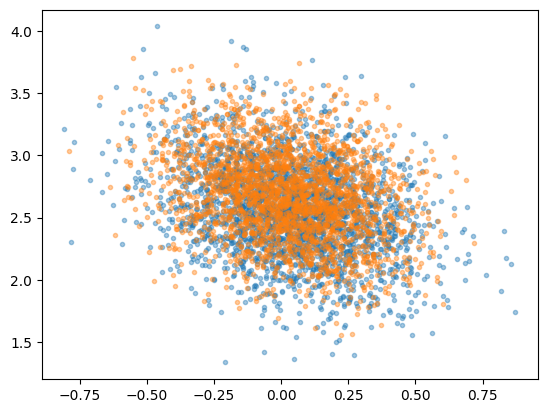

In [8]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

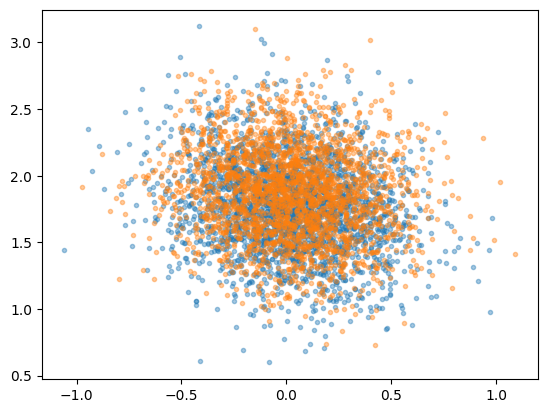

In [9]:
import matplotlib.pyplot as plt

timestep = 60

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

In [10]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [11]:
cake

Array(104.58184, dtype=float32)

In [12]:
funnel_config.model.target(out_dict[-1]["aug_ode"][:, -1,:35]).mean()

Array(-122.1814, dtype=float32)

In [13]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:35]).mean()

Array(-7.6435623, dtype=float32)

In [14]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(35) , funnel_config.model.sigma * np.ones(35))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:35]).mean()

Array(-7.6435623, dtype=float32)